In [ ]:
# This code is for the video Interpolation in Python (2022) by Mr. P Solver in Youtube. 
# https://www.youtube.com/watch?v=nGwg5MrbZxo
# Written by Amir Hossein Daraie
# Date: 4-March-2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp

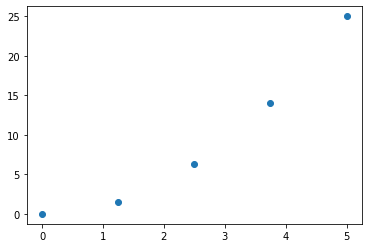

In [2]:
x_data = np.linspace(0, 5, 5)
y_data = x_data**2

plt.figure()
plt.plot(x_data, y_data, "o")
plt.show()


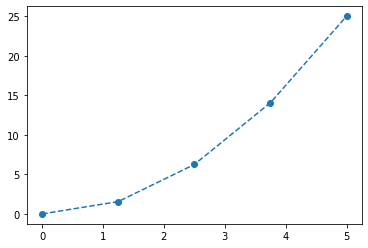

In [3]:
# the most basic interpolation - linear
plt.figure()
plt.plot(x_data, y_data, "o--")
plt.show()


In [4]:
y_f = interp1d(x_data, y_data, "linear")
y_f(1.5)


array(2.5)

In [5]:
y_f


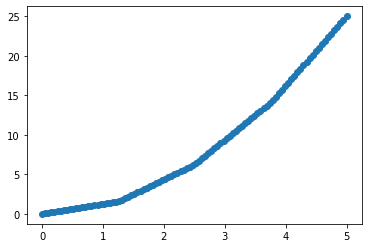

In [6]:
x = np.linspace(0, 5, 100)
y = y_f(x)

plt.figure()
plt.plot(x, y, "o")
plt.show()


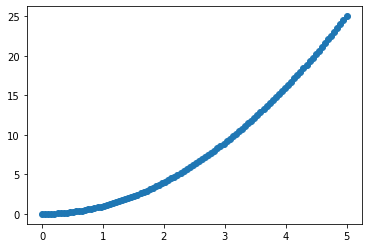

In [7]:
y_f = interp1d(x_data, y_data, "cubic")

x = np.linspace(0, 5, 100)
y = y_f(x)

plt.figure()
plt.plot(x, y, "o")
plt.show()


___
## Example: computing integral 
___

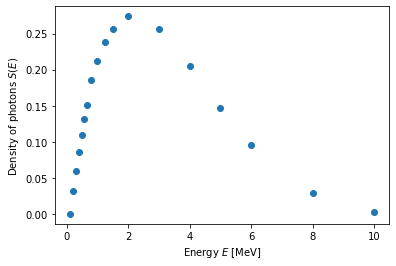

In [8]:
E_data = np.array(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.662, 0.8, 1, 1.25, 1.5, 2, 3, 4, 5, 6, 8, 10]
)

S_data = np.array(
    [
        0,
        0.032,
        0.06,
        0.086,
        0.109,
        0.131,
        0.151,
        0.185,
        0.212,
        0.238,
        0.257,
        0.274,
        0.256,
        0.205,
        0.147,
        0.096,
        0.029,
        0.002,
    ]
)

plt.figure()
plt.plot(E_data, S_data, "o")
plt.xlabel("Energy $E$ [MeV]")
plt.ylabel("Density of photons $S(E)$")
plt.show()


In [9]:
S_f = interp1d(E_data, S_data, 'cubic')

num = quad(lambda E: E*S_f(E), min(E_data), max(E_data))[0]
den = quad(lambda E: S_f(E), min(E_data), max(E_data))[0]
E_mean = num/den

print(E_mean)

3.3825472782623396


---
## Example: differential equation
___

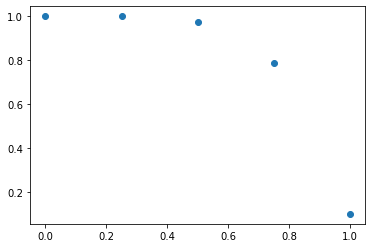

In [10]:
t_data = np.array([0, 0.25, 0.5, 0.75, 1])
m_data = np.array([1, 0.99912109, 0.971875, 0.78642578, 0.1])

plt.figure()
plt.plot(t_data, m_data, 'o')
plt.show()

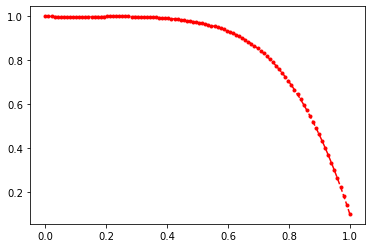

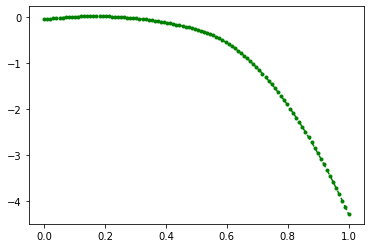

In [11]:
m_f = interp1d(t_data, m_data, "cubic")
# take the deravative w.r.t time
dmdt_f = m_f._spline.derivative(nu=1)
t = np.linspace(min(t_data), max(t_data), 100)
m = m_f(t)
dmdt = dmdt_f(t)

plt.figure()
plt.plot(t, m, '.--r')
plt.show()

plt.figure()
plt.plot(t, dmdt, ".--g")
plt.show()


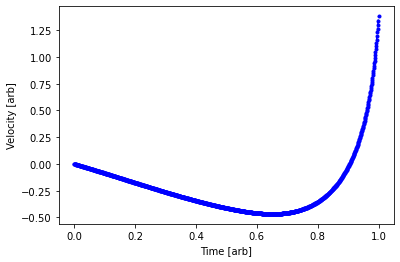

In [12]:
a = 0.78
b = 0.1


def dvdt(t, v):
    return -a - b / m_f(t) - dmdt_f(t) / m_f(t)

# solve the diff equation
sol = solve_ivp(dvdt, [1e-4, 1], y0=[0], t_eval=np.linspace(1e-4, 1, 1000))

# plot the solution
plt.figure()
plt.plot(sol.t, sol.y[0], ".--b")
plt.xlabel('Time [arb]')
plt.ylabel('Velocity [arb]')
plt.show()